In [3]:
import numpy as np
import sys
import os
import textwrap
from datetime import datetime as dt
import texts as tx

In [92]:
import sys,time

string = """ H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping"""

typing_speed = 390

def slow_type(t):
    for l in t:
        sys.stdout.write(l)
        sys.stdout.flush()
        time.sleep(10.0/typing_speed)
    print('\n')

slow_type(string)

 H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping



total: 100.815 +/- 31.723
ratio:   4.731 +/-  1.190
bar:    52.242 +/- 17.801
card:   57.490 +/- 17.057


top three: total
      total      ratio        timestamp
---+---------+----------+------------------
1":  184.50€   6.099€/h   13.08.2023 Sun AM
     holiday -> False
2":  155.30€   6.090€/h   02.09.2023 Sat AM
     holiday -> False
3":  151.28€   5.991€/h   27.08.2023 Sun PM
     holiday -> False


top three: ratio
      ratio      total        timestamp
---+---------+----------+------------------
1":  8.27€/h   140.530€   25.09.2023 Mon AM
     holiday -> False
2":  7.00€/h   112.010€   13.09.2023 Wed PM
     holiday -> False
3":  6.58€/h   124.920€   12.09.2023 Tue AM
     holiday -> False


AM
total: 107.178 +/- 29.579
ratio:   4.928 +/-  1.146

PM
total:  89.825 +/- 32.291
ratio:   4.390 +/-  1.188


holidays with weekends (Fri - Sun)
total: 105.424 +/- 33.763
ratio:   4.507 +/-  1.085

normal days
total:  92.256 +/- 25.408
ratio:   5.146 +/-  1.263


Monday
total:  94.604 +/-

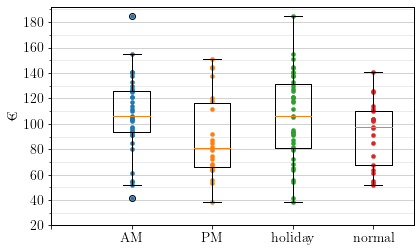

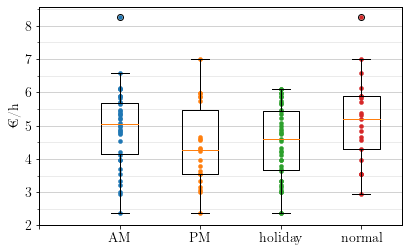

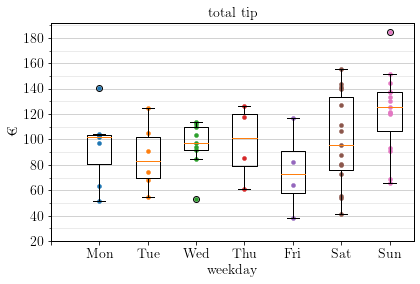

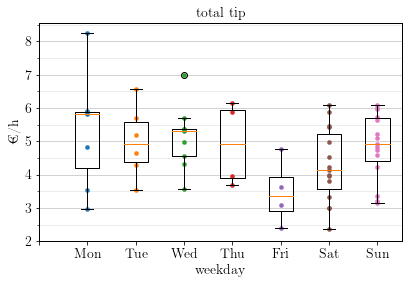

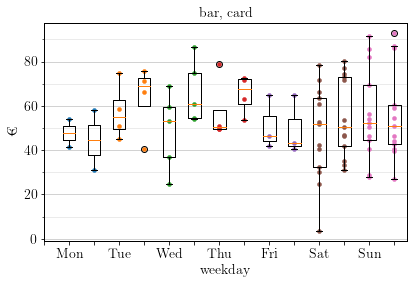

render plots done.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import fit

import statistic
statistic.statistic()